# Pittsburgh Arrest Data By Neighborhood
* Data Source: https://data.wprdc.org/dataset/arrest-data/resource/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f?view_id=a9e7e08a-9433-4263-8d1d-820002b48353


## Preparing the data
Import pandas, geopandas, and matplotlib to manipulate and describe the Arrest Data

In [152]:
import pandas as pd
import geopandas as gp
%matplotlib inline
import matplotlib.pyplot as plt

Read the CSV data into a pandas dataframe

In [123]:
arrests = pd.read_csv('Arrest-Data.csv')

Let's look at the first 10 rows to get an idea of how this data set looks

In [132]:
arrests.head()

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900


----

## Arrest Counts By Neighborhood
There's a lot of data here. To make things cleaner, let's see how many arrests occur in each neighborhood according to our data by using the value_counts() method which returns a Series of counts with corresponding names attached. We want a DataFrame with a Neighborhood column and the corresponding number of arrests instead of a Series, so we'll convert the Series to a frame and use the reset_index function to convert the names to its own column. 

In [272]:
# makes a series with neighborhoods and unique counts (the neighborhoods are row names) –– Ascending order by default
arrest_counts_descending = arrests['INCIDENTNEIGHBORHOOD'].value_counts().to_frame()

# convert row names into actual data (otherwise it's just a list of ints)
arrest_counts_descending.reset_index(inplace=True) 

# rename columns
arrest_counts_descending.columns = ['Neighborhood', 'Number of Arrests'] 

arrest_counts_descending.head(10)

,Neighborhood,Number of Arrests
0,Central Business District,2877
1,South Side Flats,2414
2,Carrick,1693
3,East Allegheny,1578
4,Homewood South,1549
5,Homewood North,1399
6,East Liberty,1309
7,Marshall-Shadeland,1099
8,Bluff,1063
9,Mount Washington,1031


 The above values are ten of the neighborhoods with the highest number of arrests from the dataset. Since we're interested in safety, let's see which neighborhoods have the lowest number of arrests by sorting the arrest_counts series in descending (non-increasing) order.

In [201]:
# Same as before but this time set ascending to true (smallest->largest)
arrest_counts_ascending = arrests['INCIDENTNEIGHBORHOOD'].value_counts(ascending=True).to_frame()

arrest_counts_ascending.reset_index(inplace=True) 

arrest_counts_ascending.columns = ['Neighborhood', 'Number of Arrests'] 

arrest_counts_ascending.head(10)

,Neighborhood,Number of Arrests
0,Mt. Oliver Neighborhood,2
1,Troy Hill-Herrs Island,6
2,Mt. Oliver Boro,17
3,Regent Square,23
4,Central Northside,23
5,Ridgemont,26
6,New Homestead,27
7,Chartiers City,28
8,Swisshelm Park,30
9,St. Clair,36


----

## Visualization

So how does this look on a map? To find out, we'll use geopandas to display a map of the crime per region. First we load in the shapefile to give us the appropriate geometry information for the neighborhoods.

In [266]:
# read in the magical shape file
neighborhood_shapes = gp.read_file("Neighborhoods/Neighborhoods_.shp")
# make sure everything's in order
neighborhood_shapes[['hood','area','perimeter','geometry']]

,hood,area,perimeter,geometry
0,Central Oakland,7843108.0,11526.863,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,13904629.0,20941.387,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,5999801.5,18271.426,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,7202139.0,15696.759,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,16947852.0,23903.078,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."
...,...,...,...,...
85,Ridgemont,10278895.0,16268.131,"POLYGON ((-80.03431 40.43366, -80.03424 40.433..."
86,West End,5579501.0,18776.656,"POLYGON ((-80.02869 40.44454, -80.02845 40.444..."
87,California-Kirkbride,6050988.0,11711.301,"POLYGON ((-80.02039 40.46285, -80.02022 40.462..."
88,Glen Hazel,12713036.0,18931.703,"POLYGON ((-79.92030 40.41205, -79.92027 40.412..."


Now we need to merge the shape DataFrame with the existing Arrests DataFrame to make the frame we will display on the map.

In [273]:
# merge arrest data and shape data
arrests_map = neighborhood_shapes.merge(arrest_counts_ascending, how='left', left_on='hood', right_on='Neighborhood')
# verify the data merged correctly
arrests_map[['hood', 'Number of Arrests', 'Neighborhood', 'geometry']].head()

,hood,Number of Arrests,Neighborhood,geometry
0,Central Oakland,389.0,Central Oakland,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,311.0,North Oakland,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,225.0,West Oakland,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,605.0,Crawford-Roberts,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,352.0,Strip District,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


After some map configuration we have a cloropleth map of arrests in Pittsburgh!

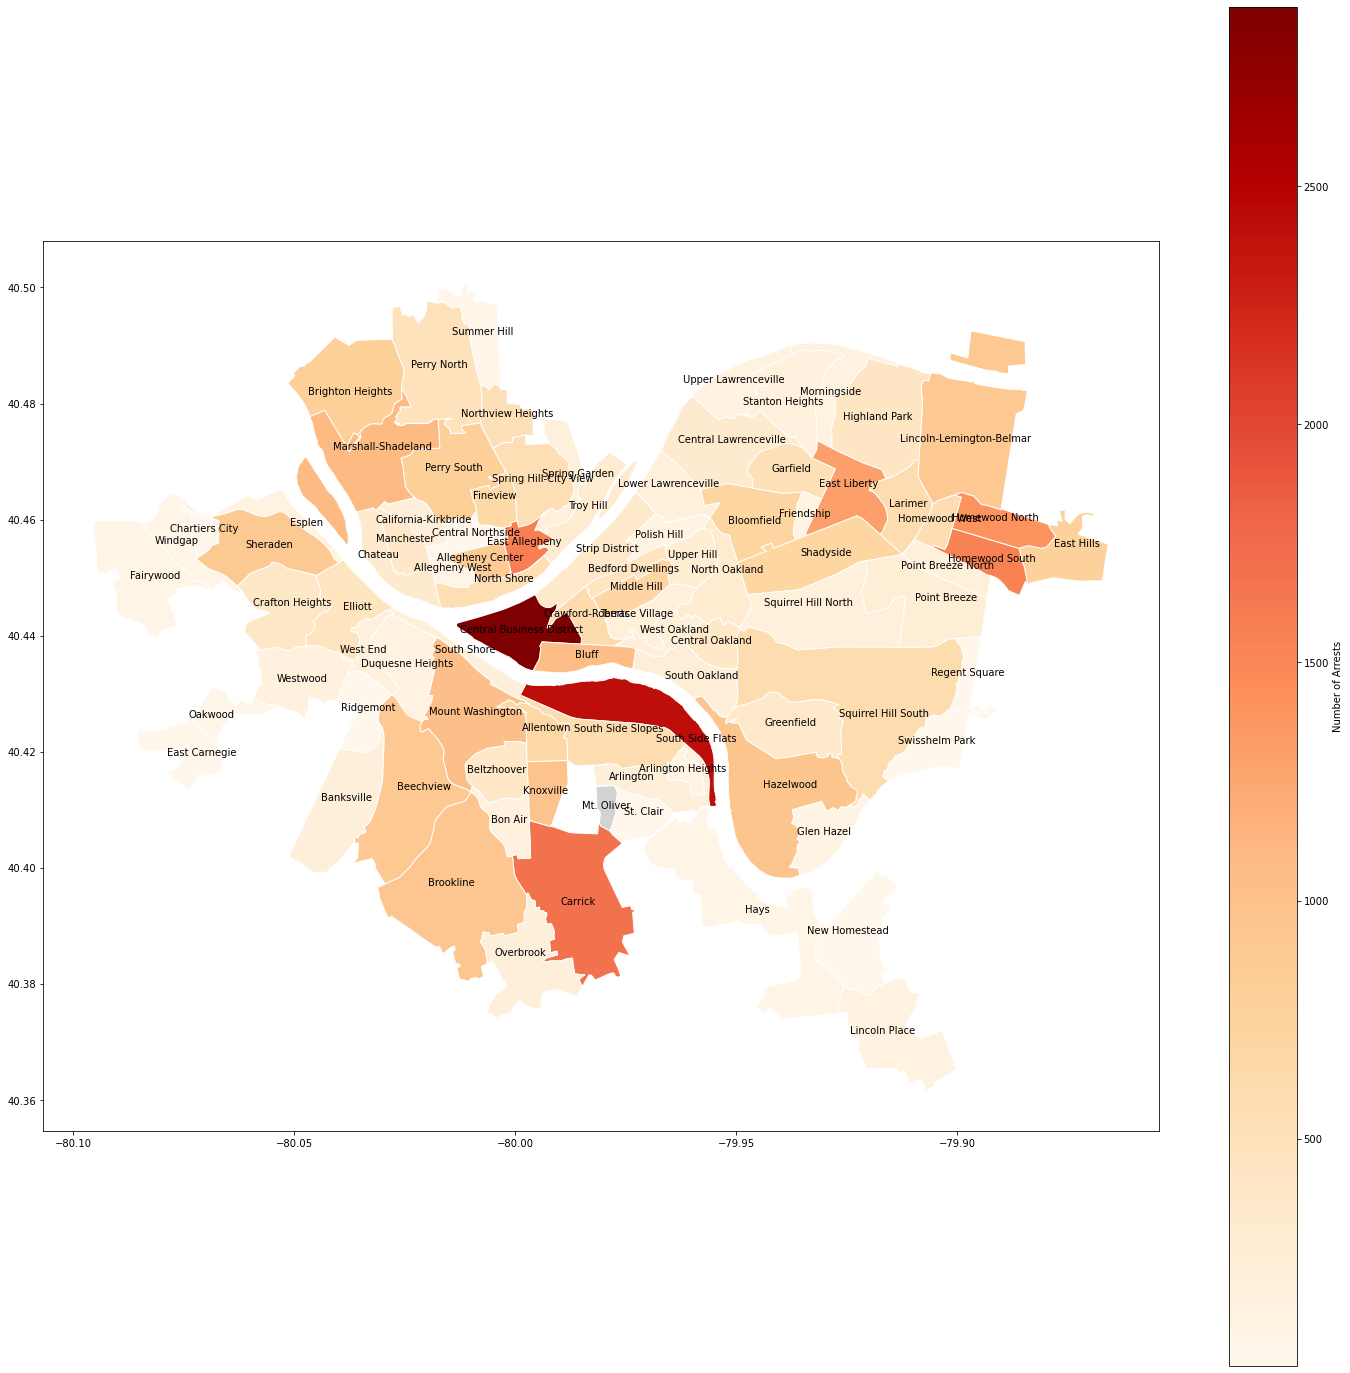

In [295]:

# Code for labeling the map (https://stackoverflow.com/questions/38899190/geopandas-label-polygons)
arrests_map['coords'] = arrests_map['geometry'].apply(lambda x: x.representative_point().coords[:])
arrests_map['coords'] = [coords[0] for coords in arrests_map['coords']]

# Map setup
arrests_map.plot(column='Number of Arrests', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Arrests"}, # label the legend
               figsize=(25, 25),         # set the size
               missing_kwds={"color": "lightgrey"}, # set disctricts with no data to gray
               )


# More map labeling code from above source
for i, row in arrests_map.iterrows():
    plt.annotate(text=row['hood'], xy=row['coords'],
                 horizontalalignment='center')


----

## Conclusion

Based on the number of arrests per neighborhood in Pittsburgh, the winner here is Mt. Oliver Neighborhood with only two arrests within the scope of this dataset. It is important to note that population size could impact this number, however in this analysis we are only concerned with sheer number of arrests indicating neighborhood safety and by this metric this is a the safest part of the city.